In [1]:
import os

import pandas as pd
import pickle as pk

from IPython.display import Image, display
from matplotlib import pyplot as plt
from sklearn import metrics
from src.data.elpv_reader import load_dataset
from src.data.preprocessing.mobilenetv2 import get_processed_data_loaders
from src.models.mobilenetv2.model_with_mobilenetv2_and_Kmeans import get_solar_cell_defect_detector
from src.models.mobilenetv2.testing import evaluate_detector_on_test_data
from src.visualization.visualize import visualize_images_by_type_and_proba, show_metrics
from src.visualization.visualize_results import plot_metrics

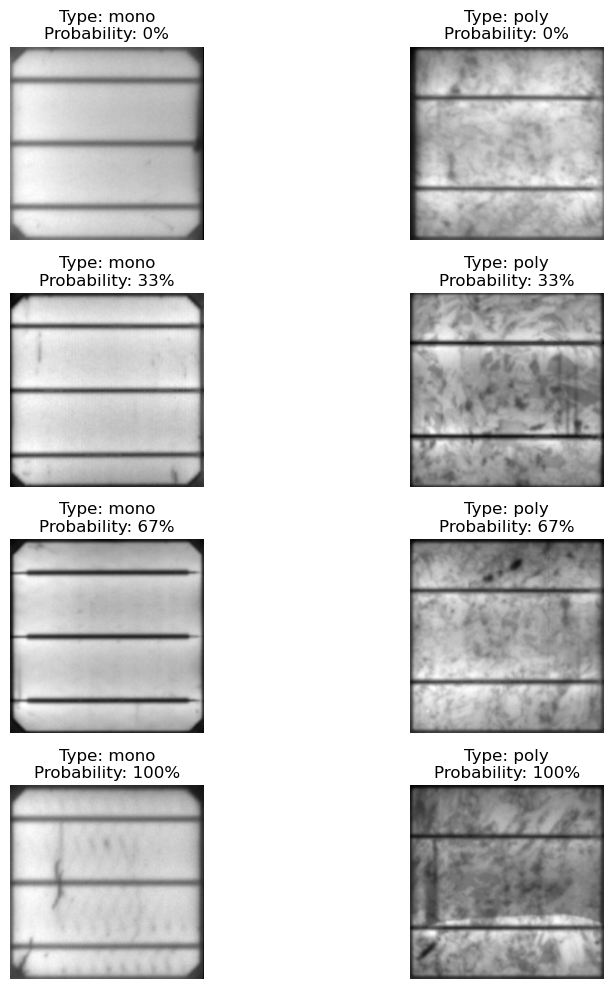

In [2]:
images, probs, types = load_dataset()
visualize_images_by_type_and_proba(images, probs, types)
metrics = dict()
model_name = 'mobilenetv2'
load_objects = True

model being trained on all the solar cell image types

In [3]:
train_loader, val_loader, test_loader , train_dataset, val_dataset = get_processed_data_loaders("both", load_data=load_objects)
solar_cell_detector_both = get_solar_cell_defect_detector(train_loader, val_loader, train_dataset, val_dataset, 'data_both', load_weights=load_objects)
metrics[("both", 224, "data")] = evaluate_detector_on_test_data(solar_cell_detector_both, test_loader, "data_both", load_results=load_objects)

data loaders loaded
Weights loaded for model 1 from the file:  /Users/fardeenmohammed/unsw/2023/term3/computer_vision/solarpanels/SolarPanel-EL-Analyzer/src/features/mobilenetv2/data_both/model1/model_1_weights.pth
kmeans model loaded from :  /Users/fardeenmohammed/unsw/2023/term3/computer_vision/solarpanels/SolarPanel-EL-Analyzer/src/features/mobilenetv2/data_both/kmeans/kmeans.pkl
Model for cluster 0 loaded from /Users/fardeenmohammed/unsw/2023/term3/computer_vision/solarpanels/SolarPanel-EL-Analyzer/src/features/mobilenetv2/data_both/model2/model2_cluster_0.pth
Model for cluster 1 loaded from /Users/fardeenmohammed/unsw/2023/term3/computer_vision/solarpanels/SolarPanel-EL-Analyzer/src/features/mobilenetv2/data_both/model2/model2_cluster_1.pth
Model for cluster 2 loaded from /Users/fardeenmohammed/unsw/2023/term3/computer_vision/solarpanels/SolarPanel-EL-Analyzer/src/features/mobilenetv2/data_both/model2/model2_cluster_2.pth
Model for cluster 3 loaded from /Users/fardeenmohammed/unsw

Accuracy:  0.9068441064638784
F1 score:  0.9054460086609685
Confusion matrix: 


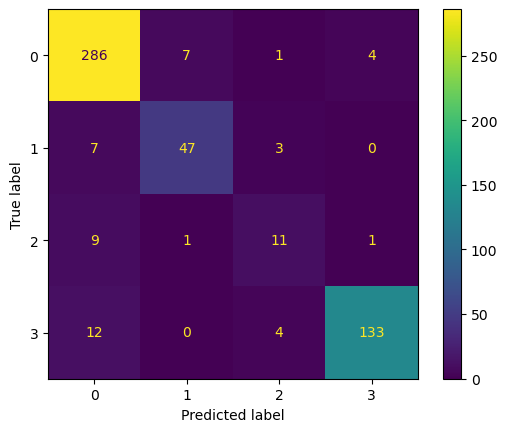

In [4]:
show_metrics(metrics[("both", 224, "data")])

Model being trained on solar cell types mono

In [5]:
train_loader, val_loader, test_loader, train_dataset, val_dataset = get_processed_data_loaders("mono", load_data=load_objects)
solar_cell_detector_mono = get_solar_cell_defect_detector(train_loader, val_loader, train_dataset, val_dataset, 'data_mono', load_weights=load_objects)
metrics[("mono", 224, "data")] = evaluate_detector_on_test_data(solar_cell_detector_mono, test_loader, "data_mono", load_results=load_objects)

data loaders loaded
Weights loaded for model 1 from the file:  /Users/fardeenmohammed/unsw/2023/term3/computer_vision/solarpanels/SolarPanel-EL-Analyzer/src/features/mobilenetv2/data_mono/model1/model_1_weights.pth
kmeans model loaded from :  /Users/fardeenmohammed/unsw/2023/term3/computer_vision/solarpanels/SolarPanel-EL-Analyzer/src/features/mobilenetv2/data_mono/kmeans/kmeans.pkl
Model for cluster 0 loaded from /Users/fardeenmohammed/unsw/2023/term3/computer_vision/solarpanels/SolarPanel-EL-Analyzer/src/features/mobilenetv2/data_mono/model2/model2_cluster_0.pth
Model for cluster 1 loaded from /Users/fardeenmohammed/unsw/2023/term3/computer_vision/solarpanels/SolarPanel-EL-Analyzer/src/features/mobilenetv2/data_mono/model2/model2_cluster_1.pth
Model for cluster 2 loaded from /Users/fardeenmohammed/unsw/2023/term3/computer_vision/solarpanels/SolarPanel-EL-Analyzer/src/features/mobilenetv2/data_mono/model2/model2_cluster_2.pth
Model for cluster 3 loaded from /Users/fardeenmohammed/unsw

Accuracy:  0.9209302325581395
F1 score:  0.9198877735589329
Confusion matrix: 


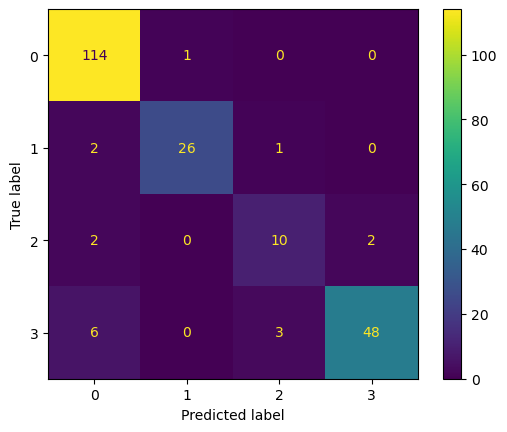

In [6]:
show_metrics(metrics[("mono", 224, "data")])

Model being trained on solar cell types poly

In [7]:
train_loader, val_loader, test_loader, train_dataset, val_dataset = get_processed_data_loaders("poly", load_data=load_objects)
solar_cell_detector_poly = get_solar_cell_defect_detector(train_loader, val_loader, train_dataset, val_dataset, 'data_poly', load_weights=load_objects)
metrics[("poly", 224, "data")] = evaluate_detector_on_test_data(solar_cell_detector_poly, test_loader, "data_poly", load_results=load_objects)

data loaders loaded
Weights loaded for model 1 from the file:  /Users/fardeenmohammed/unsw/2023/term3/computer_vision/solarpanels/SolarPanel-EL-Analyzer/src/features/mobilenetv2/data_poly/model1/model_1_weights.pth
kmeans model loaded from :  /Users/fardeenmohammed/unsw/2023/term3/computer_vision/solarpanels/SolarPanel-EL-Analyzer/src/features/mobilenetv2/data_poly/kmeans/kmeans.pkl
Model for cluster 0 loaded from /Users/fardeenmohammed/unsw/2023/term3/computer_vision/solarpanels/SolarPanel-EL-Analyzer/src/features/mobilenetv2/data_poly/model2/model2_cluster_0.pth
Model for cluster 1 loaded from /Users/fardeenmohammed/unsw/2023/term3/computer_vision/solarpanels/SolarPanel-EL-Analyzer/src/features/mobilenetv2/data_poly/model2/model2_cluster_1.pth
Model for cluster 2 loaded from /Users/fardeenmohammed/unsw/2023/term3/computer_vision/solarpanels/SolarPanel-EL-Analyzer/src/features/mobilenetv2/data_poly/model2/model2_cluster_2.pth
Model for cluster 3 loaded from /Users/fardeenmohammed/unsw

Accuracy:  0.9228295819935691
F1 score:  0.9228281735516404
Confusion matrix: 


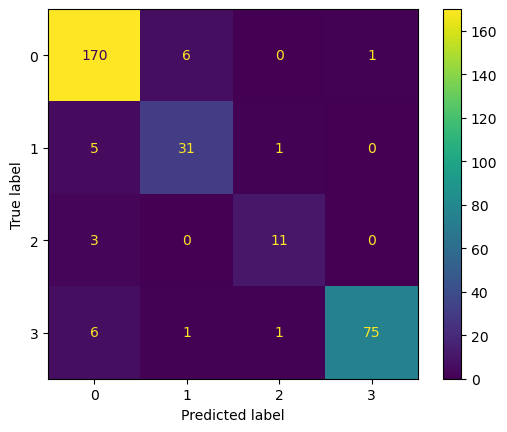

In [8]:
show_metrics(metrics[("poly", 224, "data")])

Comparision of Accuracy and F1 across this 3 training processes

Accuracy


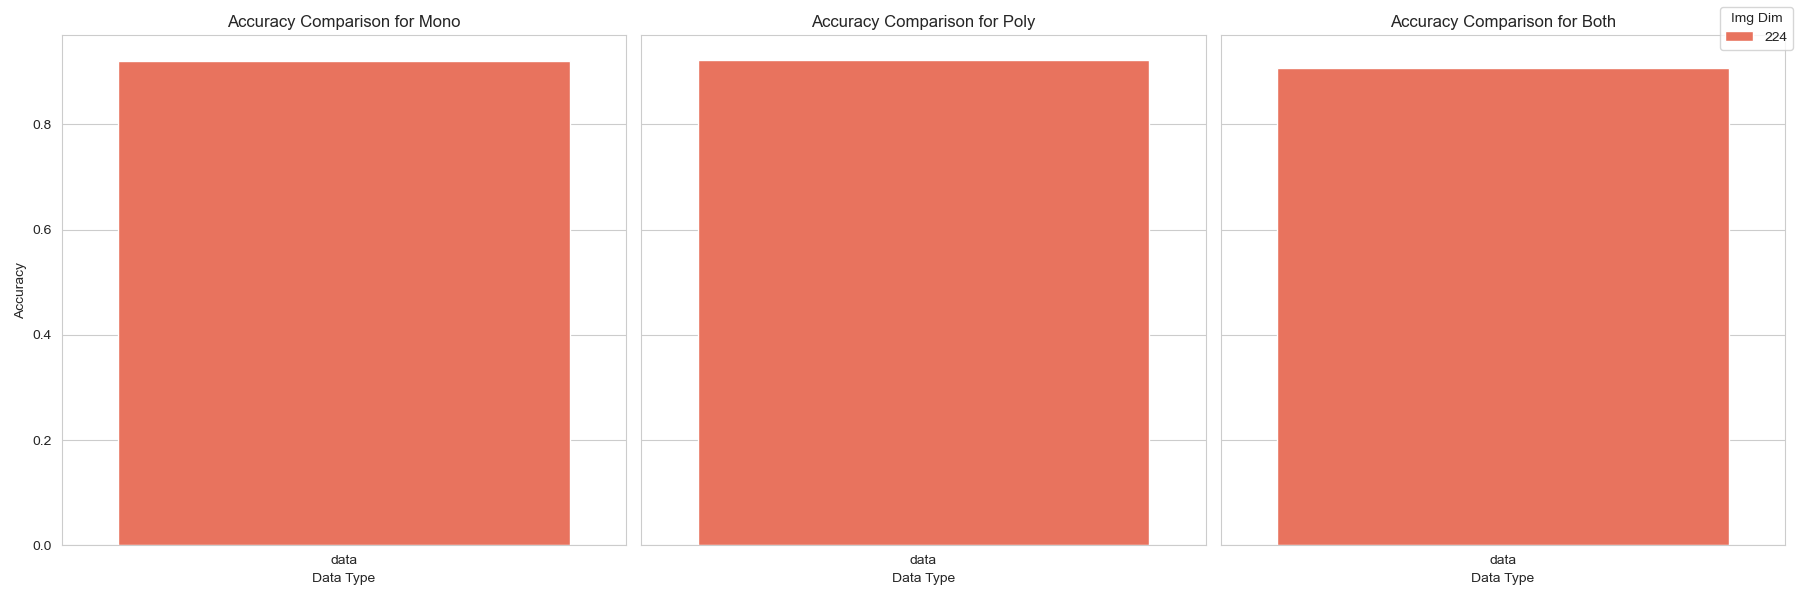

F1 score


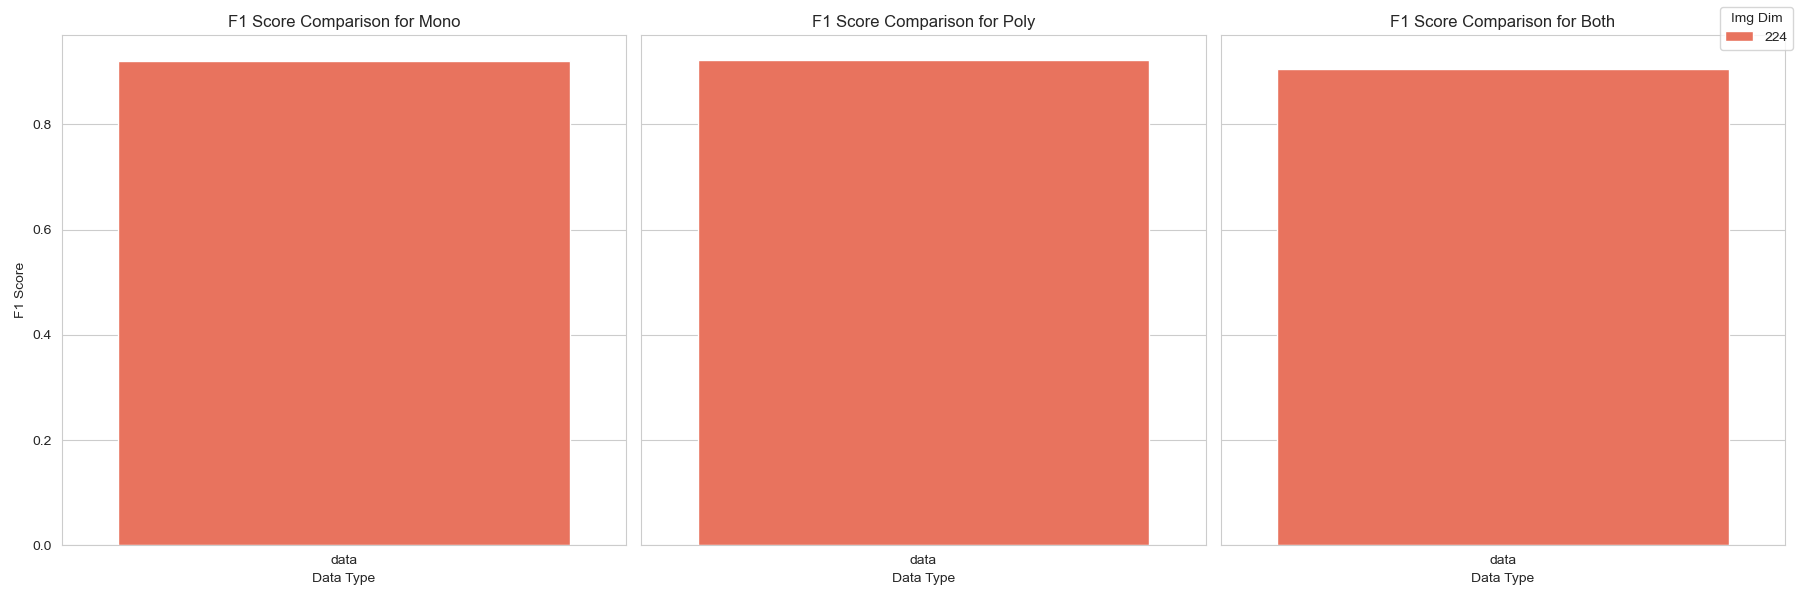

In [9]:
print('Accuracy')
display(Image(filename='plots/accuracy_mobilenetv2.png'))
print('F1 score')
display(Image(filename='plots/f1_mobilenetv2.png'))